
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [51]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization.
from matplotlib import pyplot as plt # used for plotting charts, scatter plots
import pylab # used for integrating numpy and matplotlib with a single import
import pingouin as pg # used for statistical tests

In [32]:
# Q1a (code)
df_mh = pd.read_csv('/Users/zhanghanyue/Desktop/MillerHadenData.csv')

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [52]:
# Check data types and information
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [56]:
# Q1b (code):
# Check for missing values
## Compute the number of missing values in each column of the DataFrame df_mh
missing_values = df_mh.isnull().sum()#source:https://note.nkmk.me/en/python-pandas-nan-judge-count/
print(missing_values)
# Check whether there is a data point for each participant on both variables
# Compute the number of missing values in the columns 'Abil' and 'IQ' of the DataFrame df_mh
missing_abil_iq = df_mh[['Abil', 'IQ']].isnull().sum()
print(missing_abil_iq)

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
Abil    0
IQ      0
dtype: int64


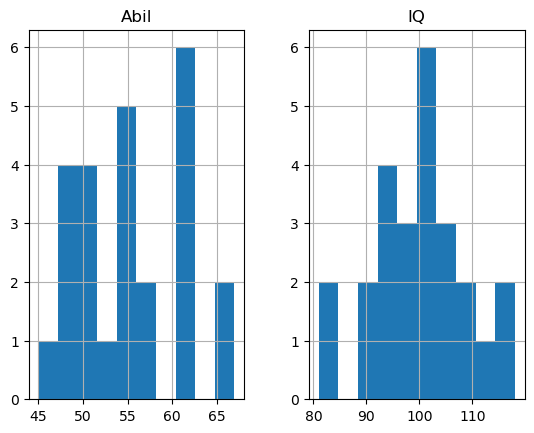

In [50]:
# Q1c (code):
# Check data distribution
df_mh.hist(column=['Abil', 'IQ'])
plt.show()

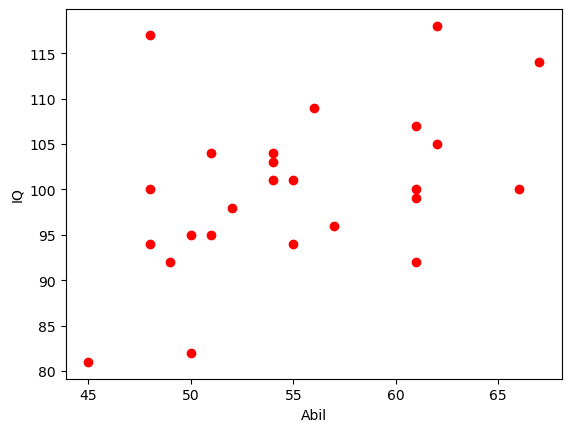

In [49]:
# Q1d (code):
# Scatter plot
Abil = df_mh['Abil']
IQ = df_mh['IQ']
plt.scatter(Abil, IQ, c="r")
plt.xlabel("Abil") 
plt.ylabel("IQ")
plt.show()

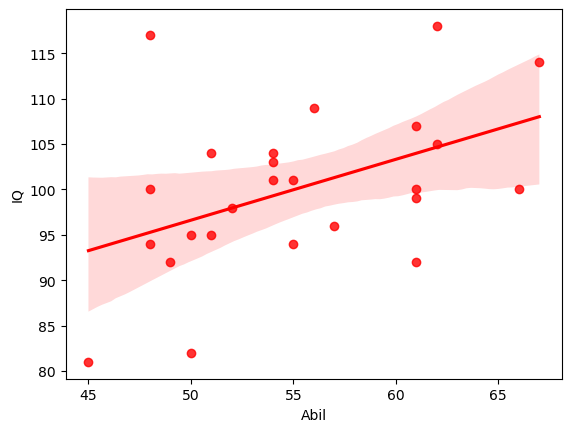

In [8]:
# Q1e (code):
# Correlation line
plot_corr_sns = sns.regplot(x="Abil", y="IQ", color="r", data=df_mh)

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

Q2a (answer with words):


Pearson. According to the results of Q1c, the data on reading ability and IQ are normally distributed and there is a linear relationship between them.

In [10]:
# Q2b (code):
corr = pg.corr(Abil, IQ)
print(corr)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


 Q2c (answer with words):
 
 
The Pearson correlation coefficient is 0.45117, which indicates that reading ability is moderately positively correlated with IQ. The p-val is 0.023593, which is less than 0.05，suggesting that the correlation is statistically significant.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

#Q3a (answer in words):

#H0:There is no relationship between reading ability and the amount of time spent reading at home per week.

#H1:There is a stong relationship between reading ability and the amount of time spent reading at home per week.

In [110]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data wrangling
from scipy.stats import chi2_contingency ##used for chisquare test

# Define the rounded average for Reading Ability and Home
abil_avg = data['Abil'].mean().round()
home_avg = data['Home'].mean().round()

# Create the Rank_Abil column
# Use the `apply` method with a lambda function to compare each value in the 'Abil' 
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'High' if x > abil_avg else 'Low')#source:https://stackoverflow.com/questions/37828489/if-and-else-in-python-lambda-expression

# Create the Rank_Home column
# Use the `apply` method with a lambda function to compare each value in the 'Home' 
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Frequent' if x > home_avg else 'Infrequent')

df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent


In [62]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
print('The contingency matrix')
print(contingency_matrix)

Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [65]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(contingency_matrix)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[4.4 5.6]
 [6.6 8.4]]


#Q3e (answer in words):

The Chi-square test results in a p-value of 0.011, which is less than the 5% significance level. Therefore, we reject the null hypothesis, concluding that there is a significant association between reading ability and the  time spent reading at home.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [11]:
import pandas as pd # used for for data wrangling
from scipy import stats #used for statistical tests
import numpy as np #used for numerical operations and array manipulations. 
import matplotlib.pyplot as plt #used for Plotting library for creating static, animated, and interactive visualizations
import seaborn as sns #used for visualization based on Matplotlib

# Load the data
df_evaluators = pd.read_csv('/Users/zhanghanyue/Desktop/evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [67]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age= df_evaluators['age'].mean()
std_age= df_evaluators['age'].std()
print(mean_age)
print(std_age)

30.852941176470587
6.238358141327351


In [68]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_count = df_evaluators[df_evaluators['sex'] == 1]['sex'].count()
female_count = df_evaluators[df_evaluators['sex'] == 2]['sex'].count()

print("Number of male evaluators:", male_count)
print("Number of female evaluators:", female_count)

Number of male evaluators: 4
Number of female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [12]:
# Load ratings data
df_ratings= pd.read_csv('/Users/zhanghanyue/Desktop/ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [38]:
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_df = ratings[ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean_ratings = filtered_df.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean_ratings['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
impression_hire_df = ratings[ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'impression_hire_df' DataFrame
ratings2 = pd.concat([intellect_mean_ratings, impression_hire_df], ignore_index=True)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2_sorted = ratings2.sort_values(by=['eval_id', 'Category']).reset_index(drop=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2_sorted.head()


,eval_id,Category,Rating,condition
0,1,hire,6.000000,listened
1,1,impression,7.000000,listened
2,1,intellect,6.000000,listened
3,2,hire,4.000000,listened
4,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



#Q6a (answer in words):

#Null hypothesis:

There is no significant difference in the overall ratings for 'intellect,' 'impression,' and 'hire' between evaluators who listened to resume pitches and those who read the resume pitches (H0: μ1 = μ2)

#Alternative hypothesis:

There is a significant difference between overall ratings between evaluators who listened to resume pitches and those who read the resume pitches.(H1:μ1/=μ2)

#we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

#Q6b (answer in words):
#Which t-test should we choose, one-tail or two-tail? Explian why.

we should choose two-tail which is non-directional. Because we aim to determine whether there is a significant difference in the overall ratings for 'intellect,' 'impression,' and 'hire' between evaluators who listened to pitches and those who read them

#Q6c (answer in words):
#What are the independent variable and the dependent variable here?

Independent variable: The way of receiving  pitches (listening or reading).

Dependent variable: Overall ratings given by the evaluators.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [41]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical tests

# Descriptive analysis of the ratings

description = ratings2_sorted['Rating'].describe()

print(description)

count    117.000000
mean       4.561254
std        2.240198
min        0.000000
25%        3.000000
50%        4.666667
75%        6.000000
max        9.000000
Name: Rating, dtype: float64


In [55]:
ratings_desc = ratings2_sorted.groupby(['Category', 'condition'])['Rating'].describe()
print(ratings_desc)

                      count      mean       std       min       25%       50%  \
Category   condition                                                            
hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
           read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
           read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
           read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   

                           75%       max  
Category   condition                      
hire       listened   7.000000  8.000000  
           read       4.000000  7.000000  
impression listened   7.333333  8.666667  
           read       5.333333  7.333333  
intellect  listened   6.000000  9.000000  
           read       4.666667  7.000000  


In [100]:
# Create df which group by Category
sub_df = ratings2.groupby("Category")
# Create seperate df for all categories
impression = sub_df.get_group("impression")
hire = sub_df.get_group("hire")
intellect = sub_df.get_group("intellect")

# Create df for 2 conditions (listened and read) in 3 categories(hire, impression and intellect)
#1.hire
hire_listen = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]
hire_read = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]
#2.impression
impression_listen = impression[(impression['Category'] == 'impression') & (impression['condition'] == 'listened')]
impression_read = impression[(impression['Category'] == 'impression') & (impression['condition'] == 'read')]
#3.intellect
intellect_listen = intellect[(intellect['Category'] == 'intellect') & (intellect['condition'] == 'listened')]
intellect_read = intellect[(intellect['Category'] == 'intellect') & (intellect['condition'] == 'read')]

In [111]:
# Test for normal distribution (Shapiro-Wilk test)
from scipy import stats
# Shapiro-Wilk Test for 'impression' ratings
score_shapiro_impression, p_val_shapiro_impression = stats.shapiro(impression_ratings)

# Shapiro-Wilk Test for 'hire' ratings
score_shapiro_hire, p_val_shapiro_hire = stats.shapiro(hire_ratings)

# Shapiro-Wilk Test for 'intellect' ratings
score_shapiro_intellect, p_val_shapiro_intellect = stats.shapiro(intellect_ratings)

print("\nShapiro-Wilk test Results:")
print('Impression:', score_shapiro_impression, p_val_shapiro_impression)
print('Hire:', score_shapiro_hire, p_val_shapiro_hire)
print('Intellect:', score_shapiro_intellect, p_val_shapiro_intellect)


Shapiro-Wilk test Results:
Impression: 0.9595586657524109 0.17238490283489227
Hire: 0.9427911043167114 0.04710420221090317
Intellect: 0.974760115146637 0.5182614326477051


In [108]:
# Test for homogeneity of variances (Levene's test)
# Test for impression, listen & read
score_levene_impression_l_r, p_val_levene_impression_l_r = stats.levene(impression_listen['Rating'], impression_read['Rating'])
# Test for hire, listen & read
score_levene_hire_l_r, p_val_levene_hire_l_r = stats.levene(hire_listen['Rating'], hire_read['Rating'])
# Test for intellect, listen & read
score_levene_intellect_l_r, p_val_levene_intellect_l_r = stats.levene(intellect_listen['Rating'], intellect_read['Rating'])


print(f"Levene's test for impression, listen & read:")
print(f"Statistic: {score_levene_impression_l_r}, p-value: {p_val_levene_impression_l_r}")


print(f"Levene's test for hire, listen & read:")
print(f"Statistic: {score_levene_hire_l_r}, p-value: {p_val_levene_hire_l_r}")

print(f"Levene's test for intellect, listen & read:")
print(f"Statistic: {score_levene_intellect_l_r}, p-value: {p_val_levene_intellect_l_r}")


Levene's test for impression, listen & read:
Statistic: 0.39045326236607025, p-value: 0.5358960150374064
Levene's test for hire, listen & read:
Statistic: 0.10663746145199855, p-value: 0.7458453933447955
Levene's test for intellect, listen & read:
Statistic: 0.8980185752566812, p-value: 0.34946205893248505


In [109]:
# Independent t-test
# Test for impression, listen & read
ttest_score_impression, p_val_impression = stats.ttest_ind(impression_listen['Rating'], impression_read['Rating'])
# Test for hire, listen & read
ttest_score_hire, p_val_hire = stats.ttest_ind(hire_listen['Rating'], hire_read['Rating'])
# Test for intellect, listen & read
ttest_score_intellect, p_val_intellect = stats.ttest_ind(intellect_listen['Rating'], intellect_read['Rating'])

print("Independent t-Tests")
print(f"Impression: t-Statistic = {ttest_score_impression}, p-value = {p_val_impression}")
print(f"Hire: t-Statistic = {ttest_score_hire}, p-value = {p_val_hire}")
print(f"Intellect: t-Statistic = {ttest_score_intellect}, p-value = {p_val_intellect}")

Independent t-Tests
Impression: t-Statistic = 2.850766179025179, p-value = 0.007091060616710596
Hire: t-Statistic = 2.620100218173143, p-value = 0.012674511839824125
Intellect: t-Statistic = 3.5259329220482414, p-value = 0.0011444414996286821


Q7b (answer in words):


1.descriptive statistics

For three categories, mean were higher in the listened condition than in the read condition, which may indicate a more positive effect on raters in the listened condition. 

In the listened condition, it can be seen that greater variability in the category of "Hire" (standard deviation 2.61) and "Impression" (standard deviation 1.92) and less variability in the category of "Intellect" (standard deviation 1.61) This suggests that raters were more divided in their ratings of "Hire" and "Impression" and more unified in their ratings of "Intellect".

In contrast, in the read condition, ratings in the categoriy of "Hire" (standard deviation 2.05), "Impression" (standard deviation 2.23), and "Intellect" (standard deviation 1.91) were similar in terms of variability.This suggests that the consistency of raters' ratings across categories was relatively even in the read condition.

2.Shapiro-Wilk test

Intellect: The p-value is 0.518, which is greater than the common alpha level of 0.05. This means that there is not enough evidence to reject the null hypothesis, and we can assume that the data for the 'intellect' category is normally distributed.

Impression: The p-value is 0.172, also greater than 0.05. Similar to the 'intellect' category, this suggests that we can assume that the data for the 'Impression' category is normally distributed.

Hire: The p-value is 0.047, which is  below the 0.05 threshold. This suggests that there is enough evidence to reject the null hypothesis for the 'hire' category, indicating that the data does not follow a normal distribution.

3.Levene's test


Impression (listen & read):
The p-value is 0.536 that much greater than 0.05, there is not enough evidence to reject the null hypothesis. This suggests that the variance in ratings for 'impression' is not significantly different between the 'listen' and 'read' conditions.

Hire (listen & read):
The p-value is 0.746 that well above the 0.05, indicating that there is no significant difference in variance for 'hire' between the two conditions.

Intellect (listen & read):
The p-value is 0.349 that also than 0.05, so again,indicating that there is no significant difference in variance for 'Intellect' between the two conditions.

4.Independent t-test


Impression:The p-value is 0.0071 that less than 0.05, which suggests that there is a significant difference in the various 'impression' between the listening and reading conditions (listen and read). 

Hire:The p-value is 0.0127 that also less than 0.05, indicating a significant difference in the means of 'hire' ratings between two conditions. 

Intellect:The p-value is 0.0011 that much less than 0.05, indicating a  asignificant difference in the means of 'intellect' ratings between the two conditions. 

In conclusion，the results of the independent t-tests provide statistical evidence indicating significant differences in the mean ratings for 'intellect,' 'impression,' and 'hire' between the groups subjected to listening and reading conditions.